## Problem Statement
The Tour & Travels Customer Churn Prediction dataset assists a travel company in 
predicting customer churn. It includes indicators such as age, frequent flyer status, 
annual income class, services opted frequency, social media account 
synchronization, and hotel bookings. 

• The goal is to build predictive models to save company resources. The dataset, 
used for practice and in a hackathon, is freely available. Analysts can perform 
exploratory data analyses to reveal insights for effective churn prediction. The 
binary target variable distinguishes customers who churn (1) from those who don't 
(0), guiding the modeling process

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("Customertravel.csv")

In [3]:
df.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [4]:
# checking for any null values
df.isnull().any()

Age                           False
FrequentFlyer                 False
AnnualIncomeClass             False
ServicesOpted                 False
AccountSyncedToSocialMedia    False
BookedHotelOrNot              False
Target                        False
dtype: bool

In [5]:
df.shape

(954, 7)

In [6]:
# calculating average age of the customers
avg_age = df['Age'].mean()

In [7]:
avg_age

32.109014675052414

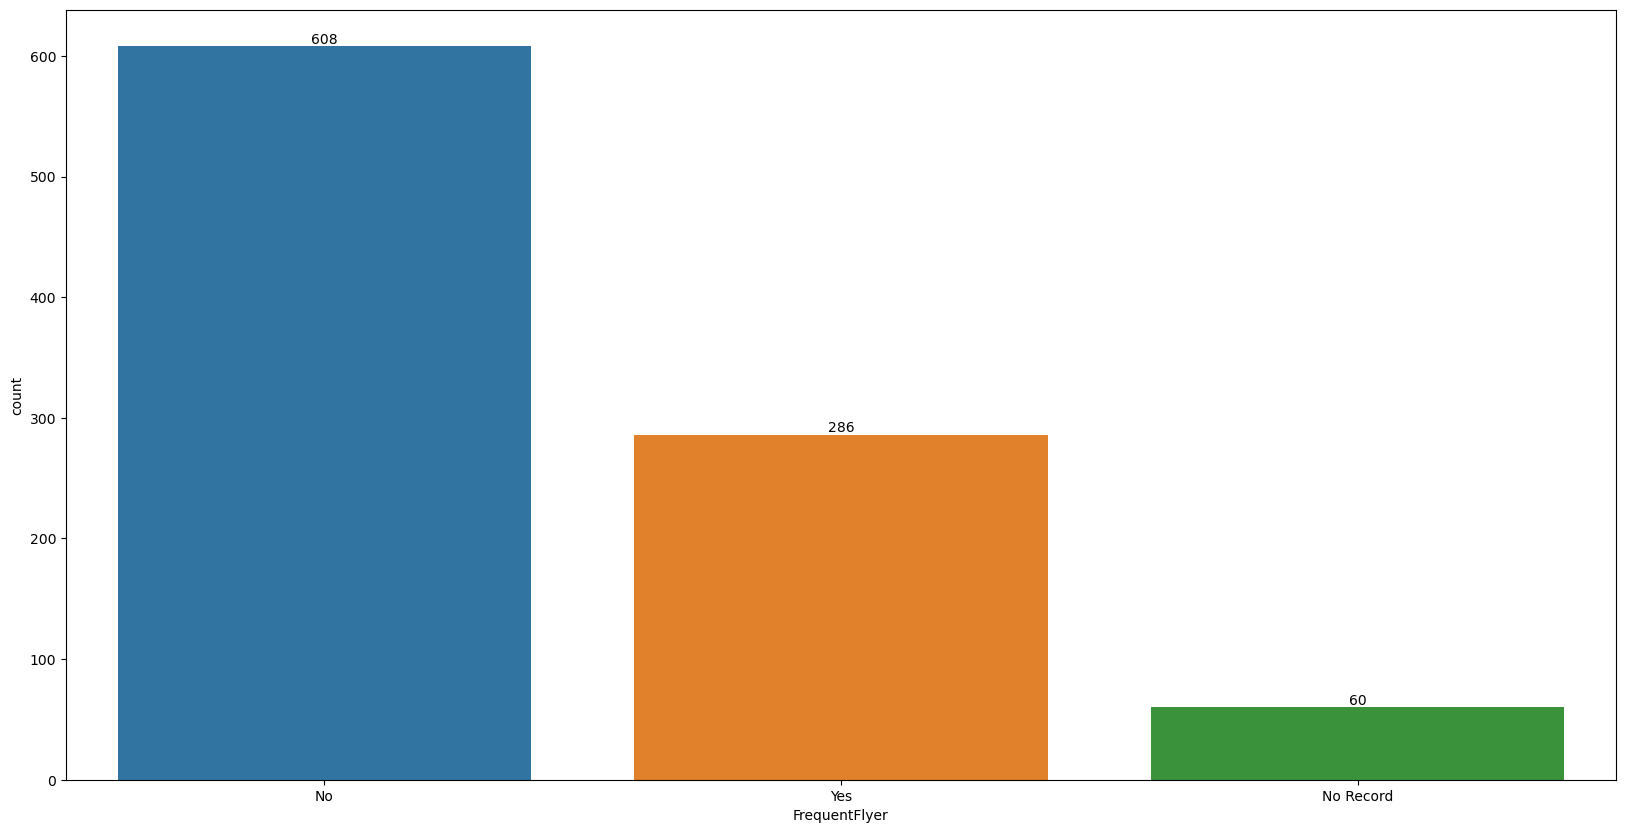

In [8]:
# calculating the count of frequent flyers in the customers
plt.figure(figsize = (20,10))
ax = sns.countplot(data = df,x='FrequentFlyer')
for bars in ax.containers:
    ax.bar_label(bars)

From above result we can see that the maximum customers don't prefer to fly frequently

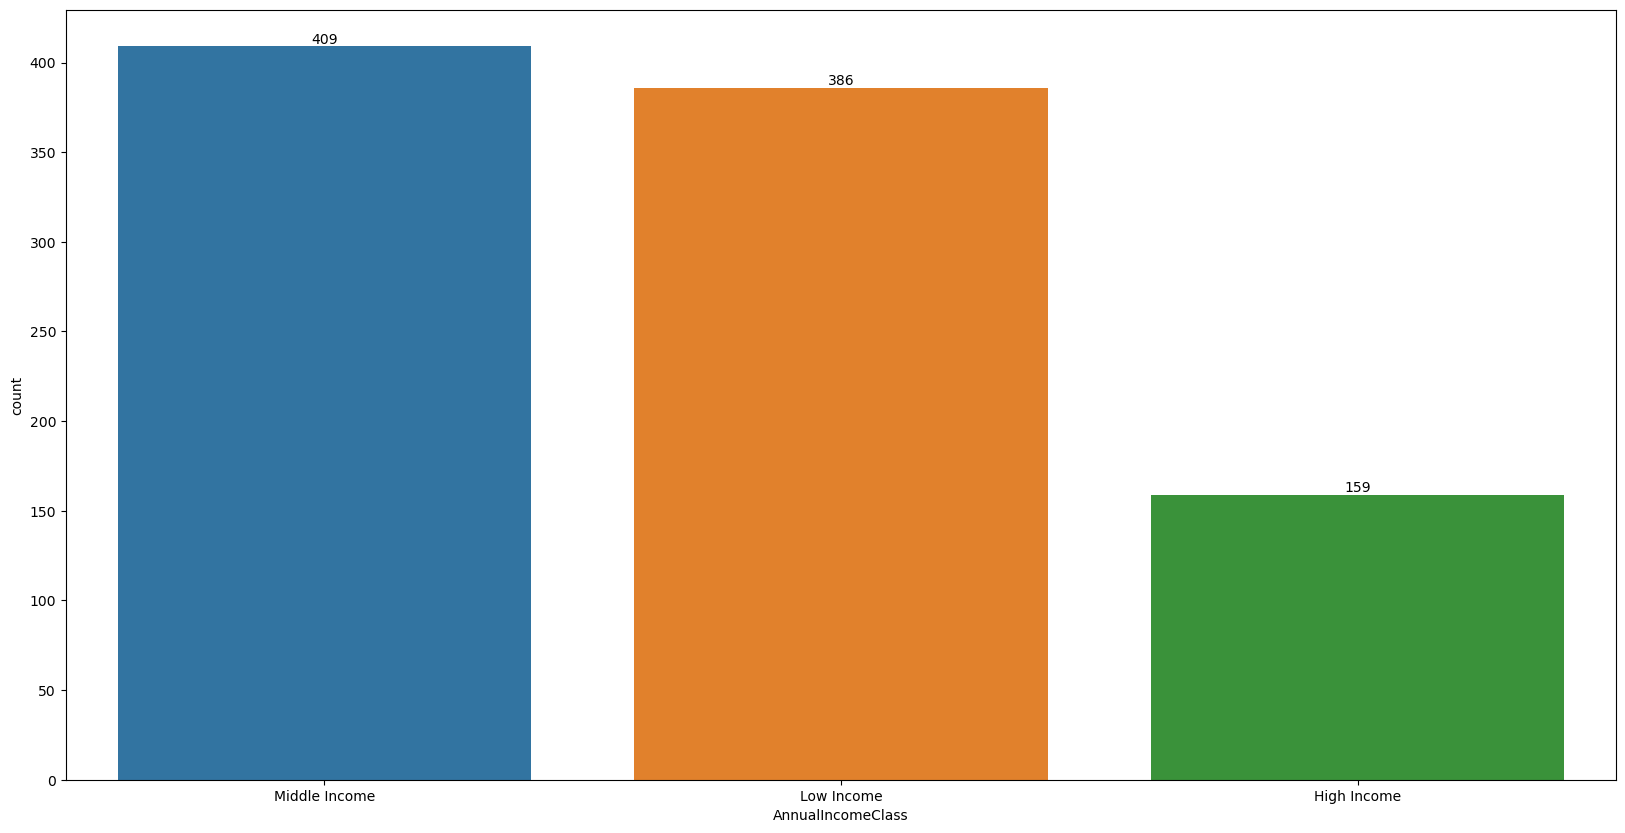

In [9]:
# calculating the count of Income class of the customers
plt.figure(figsize = (20,10))
ax = sns.countplot(data = df,x='AnnualIncomeClass')
for bars in ax.containers:
    ax.bar_label(bars)

In [10]:
# grouping the age with frequent flyers column to find the average age of customers based on their flying routine
flyer_by_age = df.groupby('FrequentFlyer')['Age'].mean().sort_index()

In [11]:
print(flyer_by_age)

FrequentFlyer
No           32.062500
No Record    31.383333
Yes          32.360140
Name: Age, dtype: float64


In [12]:
# calculating average age based on income class
income_by_age = df.groupby('AnnualIncomeClass')['Age'].mean().sort_index()

In [13]:
income_by_age

AnnualIncomeClass
High Income      31.773585
Low Income       32.067358
Middle Income    32.278729
Name: Age, dtype: float64

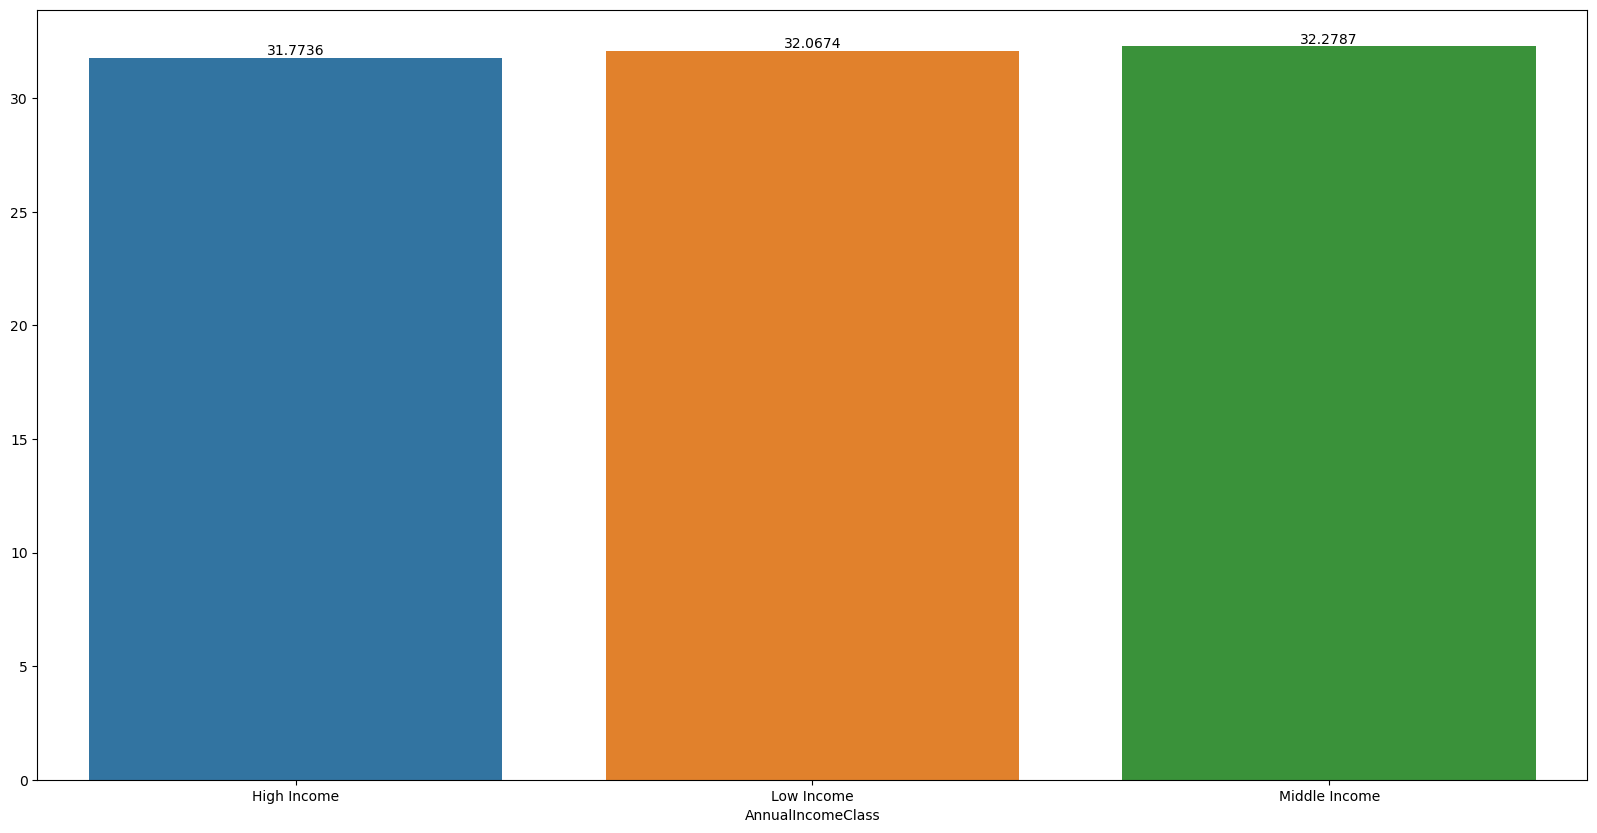

In [14]:
plt.figure(figsize = (20,10))
ax = sns.barplot(x=income_by_age.index , y=income_by_age.values)
for bars in ax.containers:
    ax.bar_label(bars)

In [15]:
# calculating income class and frequent flyer
income_flyer = df.groupby('AnnualIncomeClass')['FrequentFlyer'].value_counts()

In [16]:
income_flyer

AnnualIncomeClass  FrequentFlyer
High Income        Yes              159
Low Income         No               237
                   Yes              127
                   No Record         22
Middle Income      No               371
                   No Record         38
Name: FrequentFlyer, dtype: int64

by above result we can see that High Income people frequently fly where as Low and Middle Income people prefer Not to fly Frequently

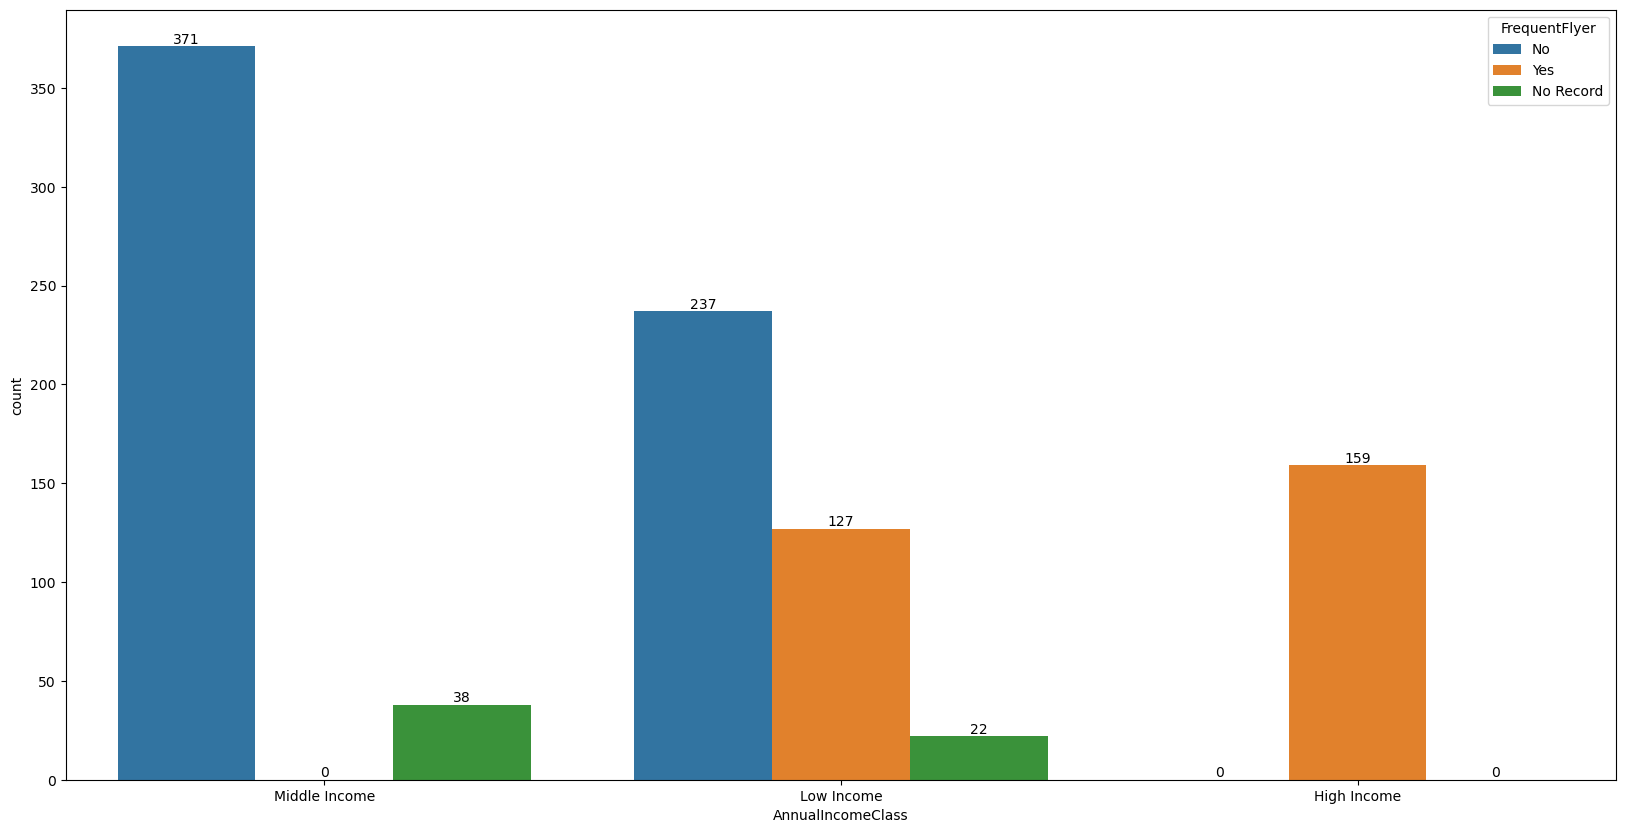

In [17]:
# plotting a graph which shows the income classes based on frequent flyer
plt.figure(figsize = (20,10))
ax = sns.countplot(data = df,x='AnnualIncomeClass',hue = 'FrequentFlyer')
for bars in ax.containers:
    ax.bar_label(bars)

From above graph we can understand that middle income people prefer not to take flights frequently

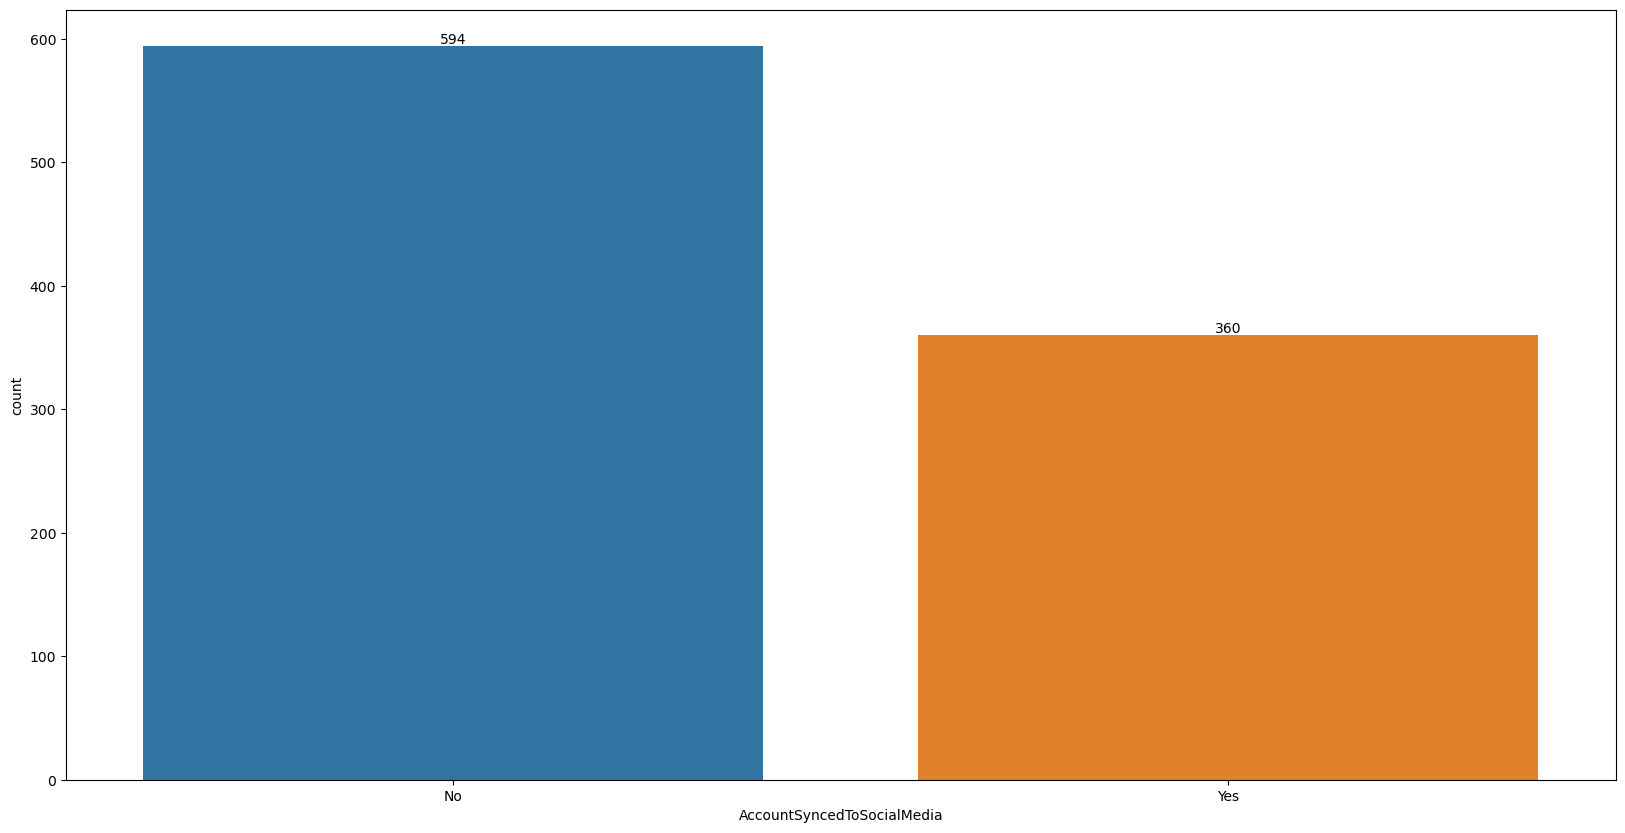

In [18]:
# plotting a graph which shows the customers who's account synced to social media or not
plt.figure(figsize = (20,10))
ax = sns.countplot(data = df,x='AccountSyncedToSocialMedia')
for bars in ax.containers:
    ax.bar_label(bars)

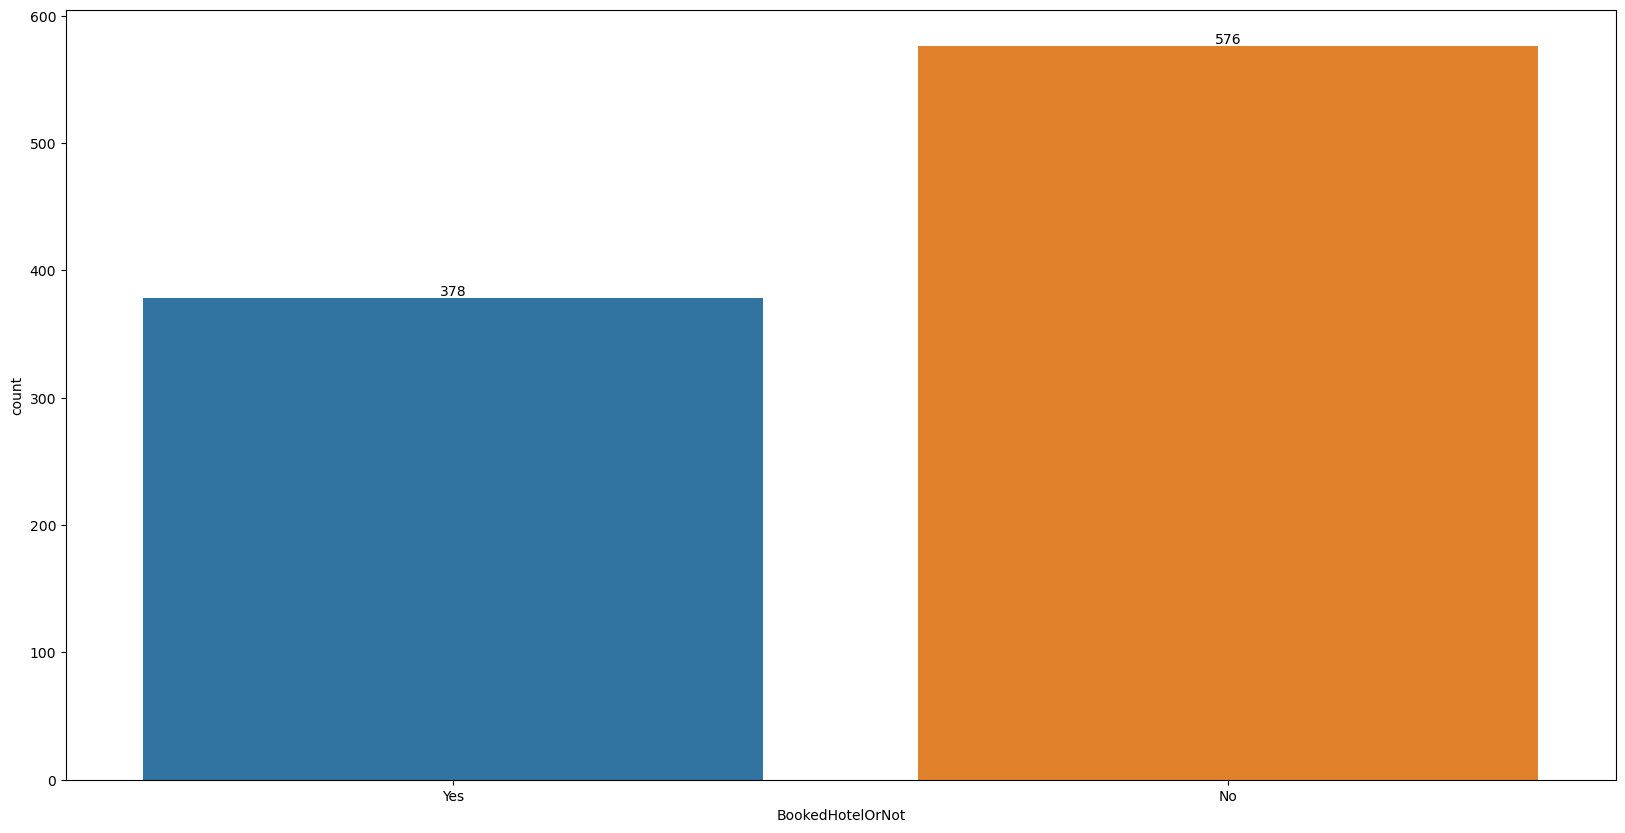

In [19]:
# plotting a graph which shows the customers hotel booking status
plt.figure(figsize = (20,10))
ax = sns.countplot(data = df,x='BookedHotelOrNot')
for bars in ax.containers:
    ax.bar_label(bars)

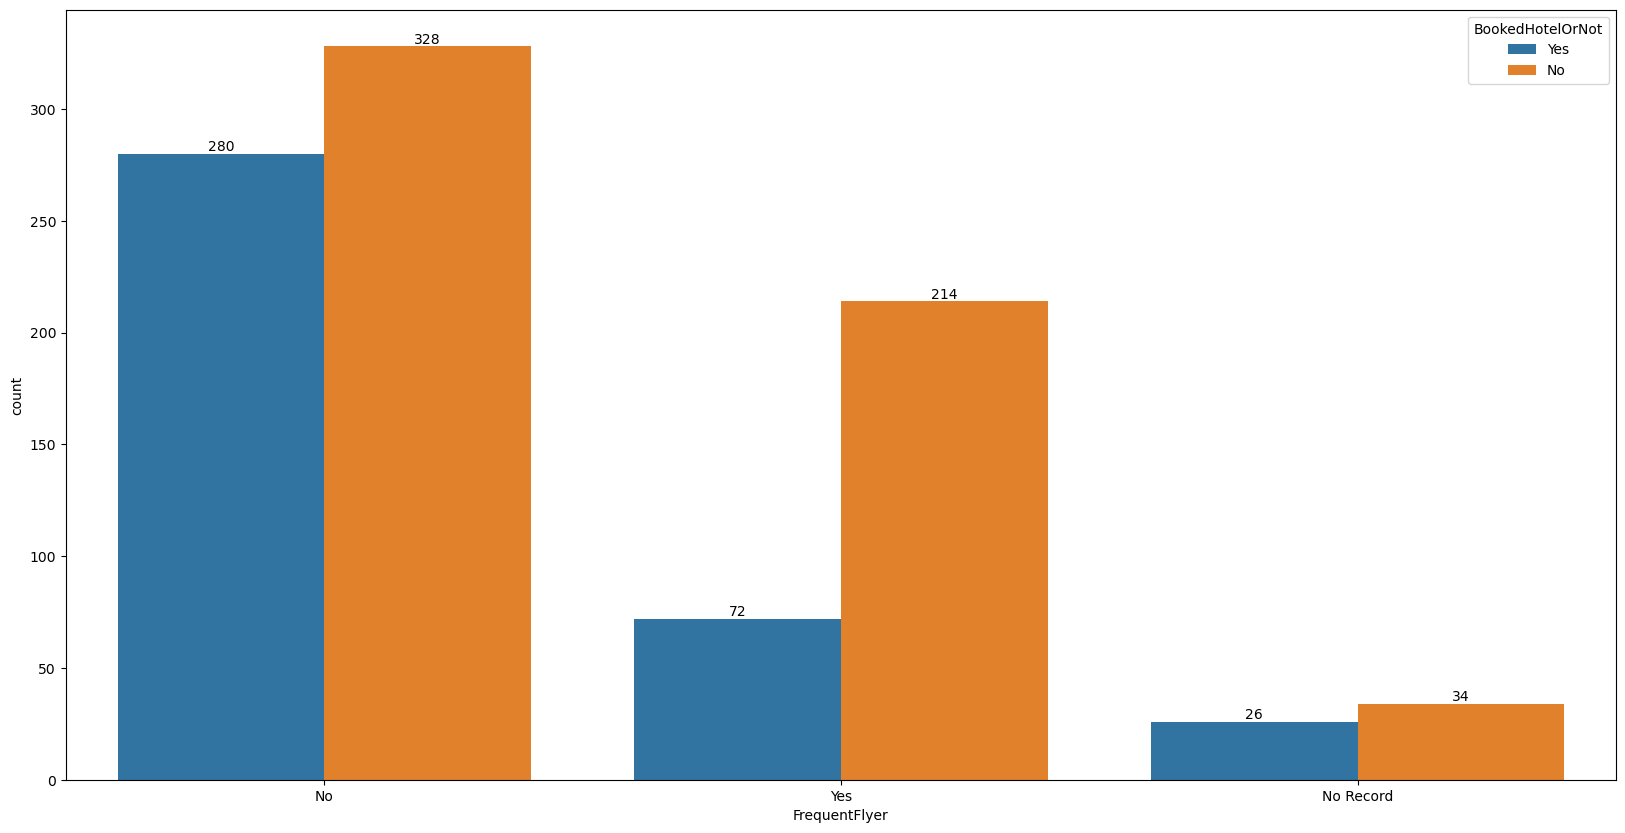

In [20]:
plt.figure(figsize = (20,10))
ax = sns.countplot(data = df,x='FrequentFlyer',hue = 'BookedHotelOrNot')
for bars in ax.containers:
    ax.bar_label(bars)

From above graph we can understand that the customers who don't fly frequently book the hotels for their stay
and those whofly frequently they not to book the hotels

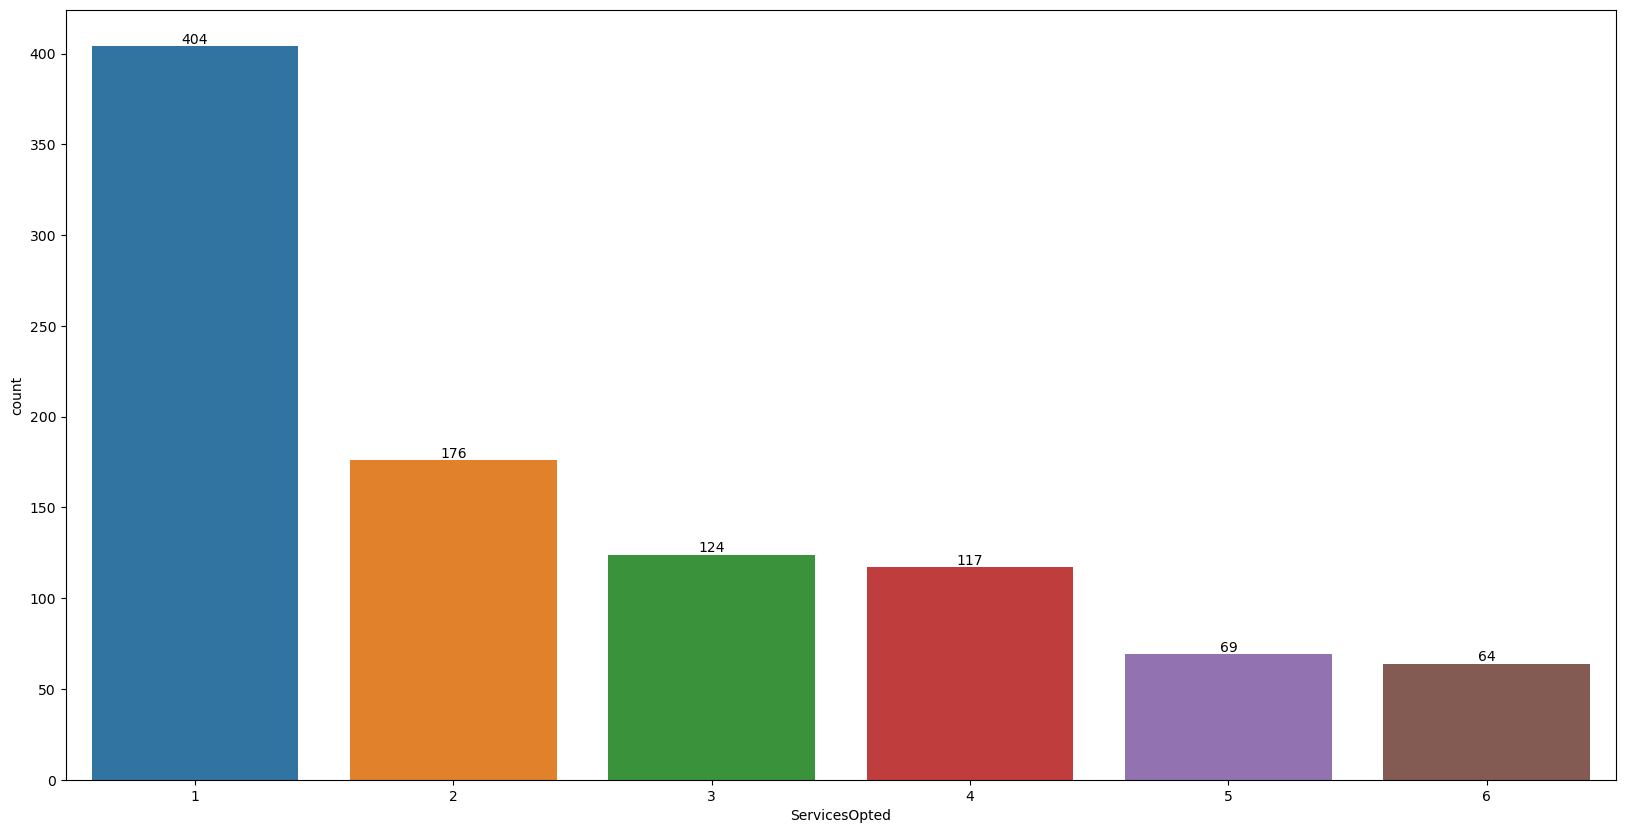

In [21]:
plt.figure(figsize = (20,10))
ax = sns.countplot(data = df,x='ServicesOpted')
for bars in ax.containers:
    ax.bar_label(bars)

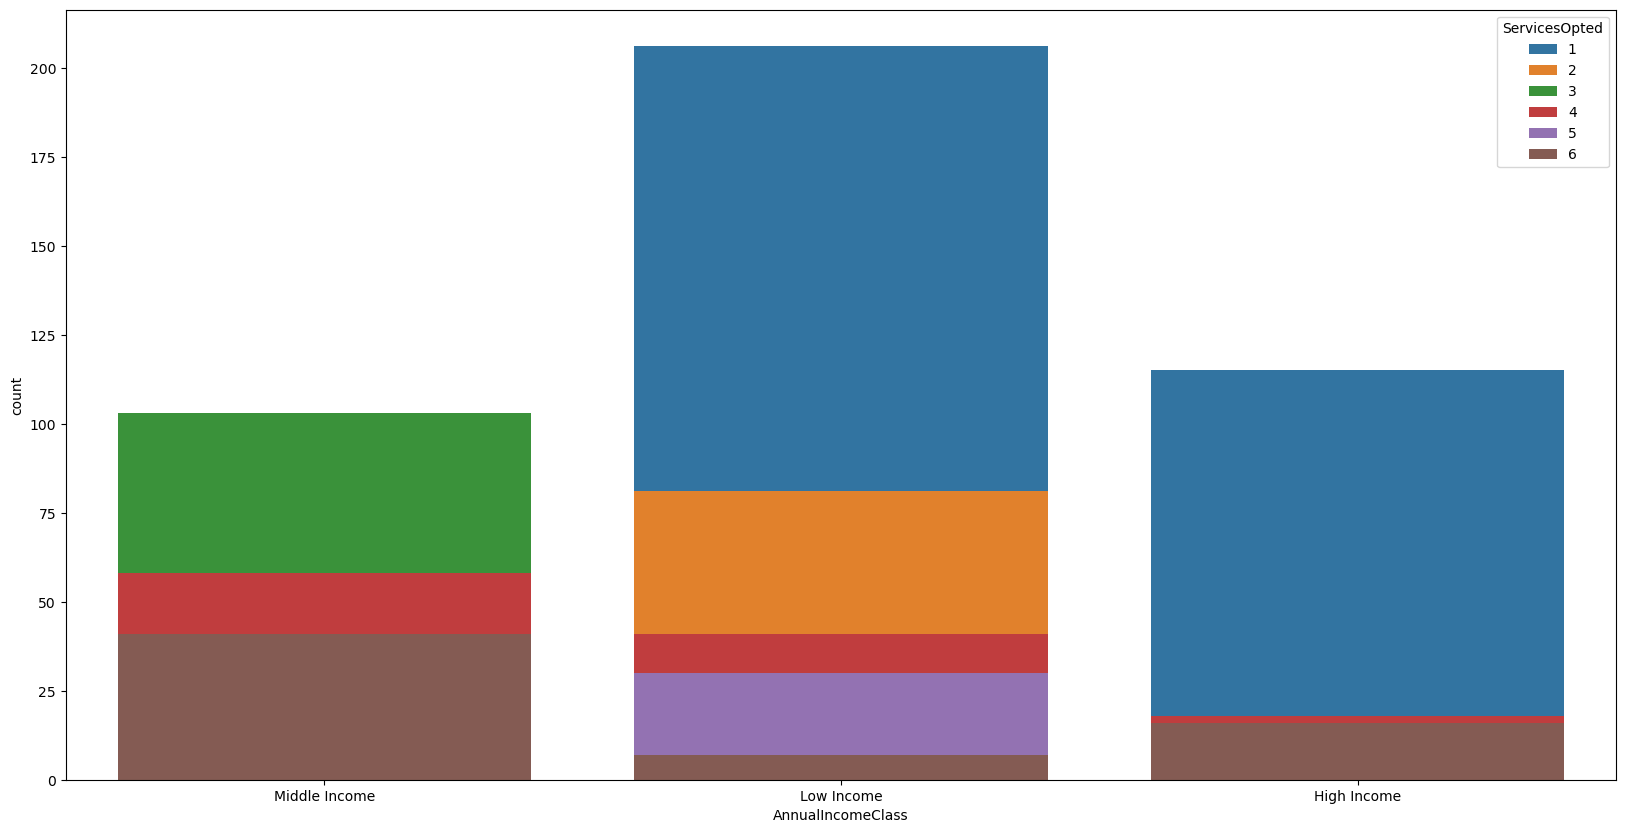

In [22]:
plt.figure(figsize = (20,10))
sns.countplot(data =df ,x= 'AnnualIncomeClass',hue='ServicesOpted',dodge=False)
plt.show()

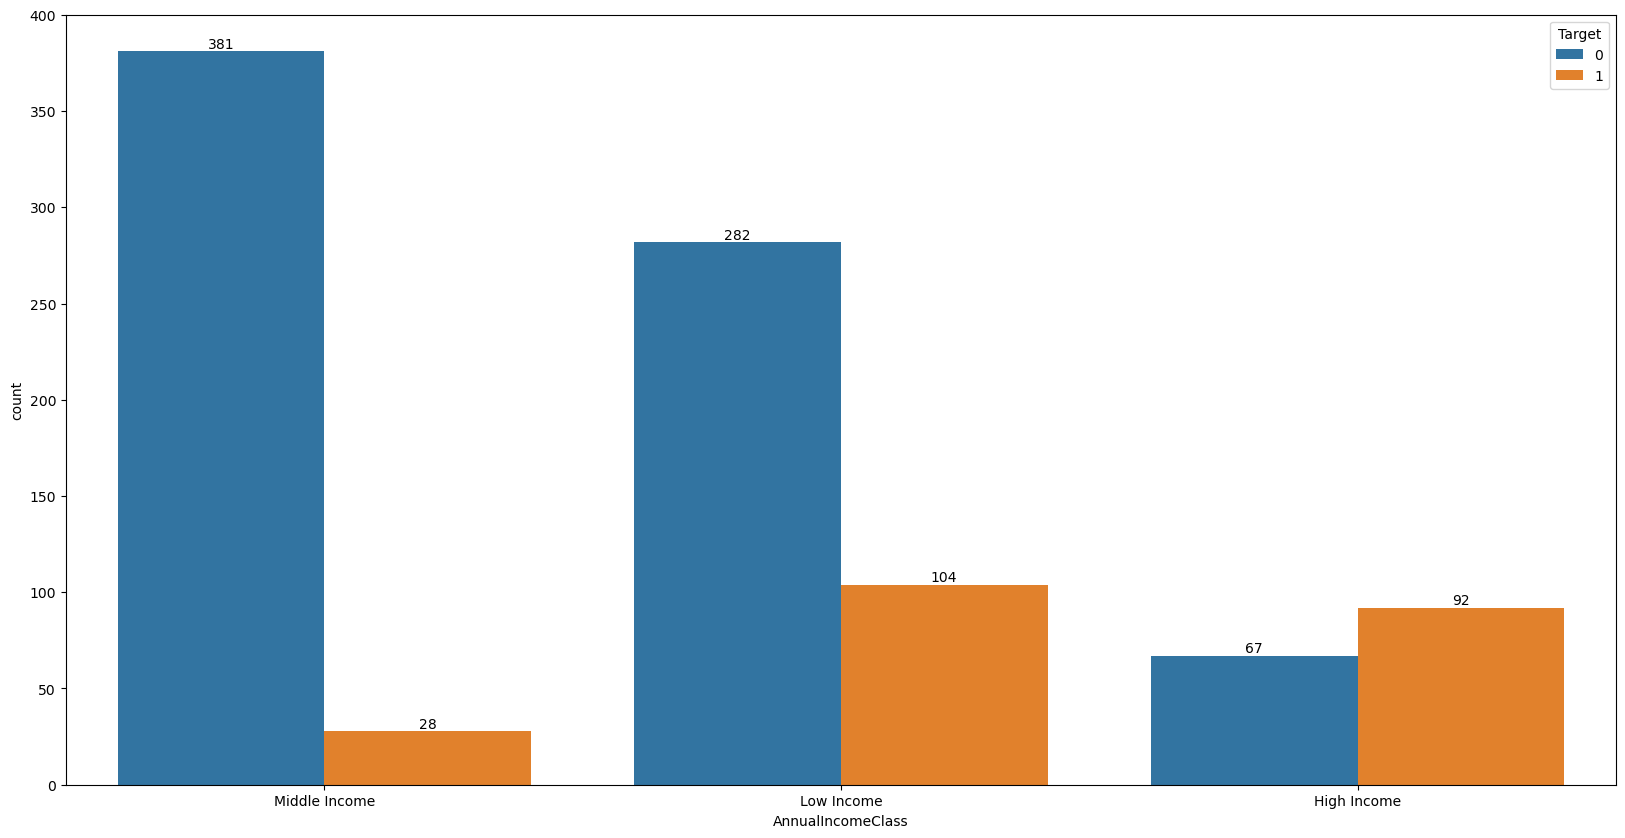

In [23]:
plt.figure(figsize = (20,10))
ax = sns.countplot(data = df,x='AnnualIncomeClass',hue = 'Target')
for bars in ax.containers:
    ax.bar_label(bars)

Building the model 

In [24]:
le = LabelEncoder()
# encoding the values

In [25]:
cat_col = df.select_dtypes(include = ['object']).columns
for i in cat_col:
    df[i] = le.fit_transform(df[i])

In [26]:
# selecting vales 
x = df.drop(columns=['Target'])

In [27]:
y = df['Target']

In [28]:
# spliting the data for training and testing
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1,test_size=0.2)

In [29]:
scaler = StandardScaler()

In [30]:
x_trian_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [31]:
x_trian_scaled

array([[-0.58830739, -0.73331065,  1.03128874, -0.26303681, -0.78301202,
        -0.79833518],
       [-0.58830739, -0.73331065, -0.3443639 ,  0.99525213,  1.2771196 ,
        -0.79833518],
       [ 1.2036229 ,  1.4651806 , -0.3443639 ,  0.36610766,  1.2771196 ,
        -0.79833518],
       ...,
       [ 1.50227795, -0.73331065,  1.03128874,  0.36610766, -0.78301202,
        -0.79833518],
       [ 0.30765776, -0.73331065, -0.3443639 ,  1.6243966 ,  1.2771196 ,
         1.25260671],
       [ 1.50227795,  1.4651806 , -0.3443639 , -0.89218128,  1.2771196 ,
        -0.79833518]])

In [32]:
x_test_scaled

array([[ 1.6542731 ,  1.51118703, -0.42954839, -0.90857146, -0.76060002,
        -0.85811633],
       [-0.82632483,  1.51118703, -1.8201203 , -0.90857146, -0.76060002,
         1.16534316],
       [-0.82632483, -0.71766797, -0.42954839, -0.3080969 ,  1.31475147,
         1.16534316],
       ...,
       [ 0.72404887, -0.71766797, -0.42954839, -0.90857146,  1.31475147,
        -0.85811633],
       [ 0.41397413, -0.71766797,  0.96102352,  2.09380135, -0.76060002,
         1.16534316],
       [ 1.03412361,  1.51118703, -0.42954839, -0.3080969 ,  1.31475147,
        -0.85811633]])

In [33]:
# building a logistic regression model
model = LogisticRegression(random_state=0)

In [34]:
model.fit(x_trian_scaled,y_train)

LogisticRegression(random_state=0)

In [35]:
y_pred = model.predict(x_test_scaled)

In [36]:
accuracy_score(y_test,y_pred)

0.8167539267015707